# This notebook is a toxic comment classifier

Here are some links that we may use in the future

[Toxic Comment Project Repo](https://github.com/Prakhar-FF13/Toxic-Comments-Classification)

[Toxic Comment Kaggle Competition Page](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification)

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
train_data = pd.read_csv("../data/train.csv.zip", index_col="id", compression="zip")

In [6]:
train_data.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


<AxesSubplot:xlabel='target', ylabel='Density'>

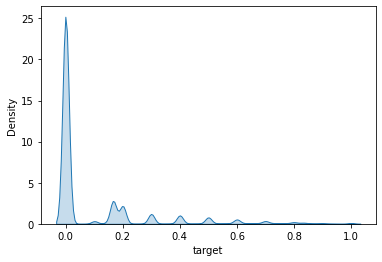

In [7]:
sns.kdeplot(data=train_data['target'], shade=True)

In [16]:
# Clamping toxicity levels to 1 and 0
train_data.loc[train_data["target"] >= 0.5] = 1
train_data.loc[train_data["target"] < 0.5] = 0

In [17]:
train_data.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0
59849,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0
59852,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0
59855,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0
59856,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1.0,1,1


<AxesSubplot:xlabel='target', ylabel='Count'>

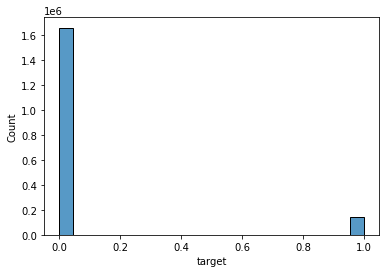

In [22]:
sns.histplot(data=train_data, x="target")